<div class="alert alert-info"> Hey! This is a continual work in progress, which means things are bound to be broken! </div>

# Exploring the PLAICRAFT Datasets
Liam Murray (87357539) | May 21, 2025

<span style="color: grey">Introductory activities and workflows for approaching the PLAICRAFT dataset.</span>

## Activity #1 - Preliminary

**Q: What is the dataset about?** \
`players.csv` provides demographic information about players, including Name, Age, Gender, Experience etc. \
`sessions.csv` provides information on each recorded game session, including the player (via hashed email), and the start and end times (both the unix time stamp and the adjusted calendar date and time). 

**Q: How many variables are there?** \
A quick call of the `head` function shows that there are 5 variables contained within `sessions.csv` and 7 variables within `players.csv` when presented as a tibble.

In [1]:
library(tidyverse)
require(janitor)
library(lubridate)
library(hms)

session_data <- read_csv("data/sessions.csv") |> 
    clean_names() |>
    mutate(session_length = (original_end_time - original_start_time)/60)
player_data <- read_csv("data/players.csv") |> 
    clean_names() |>
    mutate(gender = as_factor(gender)) |>
    mutate(experience = as_factor(experience))

head(session_data)
head(player_data)

session_data

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: janitor


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘hms’


The following object is masked from ‘package:lubridate’:

    hms


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to

hashed_email,start_time,end_time,original_start_time,original_end_time,session_length
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12,0
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12,0
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12,0
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12,0
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12,0
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12,0


experience,subscribe,hashed_email,played_hours,name,gender,age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashed_email,start_time,end_time,original_start_time,original_end_time,session_length
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12,0.0
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12,0.0
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12,0.0
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12,0.0
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12,0.0
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12,0.0
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12,0.0
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12,166666.7
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12,0.0


**Q: How many observations are there?** \
There are 196 observations within `players.csv` and 1535 observations within `sessions.csv`.

In [2]:
summarize(
    player_data, num_players = n()
)

summarize(
    session_data, num_sessions = n()
)

num_players
<int>
196


num_sessions
<int>
1535


## Activity #2 - Outcome Variable

<div class="alert alert-warning"> Tip: Think about how you are organising your workbook: add more code and markdown cells (and arranged them!) to keep your notebook neat</div>

**Q:Identify the main outcome/categorical/label variable in the dataset.**

Outcome: Subscribe - this could be reflective of question 1 (characteristics/behaviours being predictive of subscribing to a newsletter).
         Played_hours - this could be an outcome when analyzing which players are most likely to contribute time to the server.

Categorical: Age, Gender, and Experience - these could be used as the predictors for behaviours within players, including likelyhood to subscribe, activity on the server, and gaming patterns throughout the day.

Label: Name, hashedEmail - these variables are used to identify and track individual participants, these would likely not be useful for modeling and were only collected for participant registration.

**Q:How many values/groups are in this variable?**
<center>

| **Variable** | **# of groups** |
|--------------|-----------------|
| experience   | 5               |
| subscribe    | 2               |
| played_hours | 43              |
| gender       | 7               |
| age          | 31              |

</center>

**Q:How many observations are there in each value/group?**

Played hours had a large variation within the number of hours played and how many players, and was excluded from this section due to the complexity of presenting this information in an accessible and meaningful way.

<img src="Visuals/Experience-Levels.png" alt="Player Experience Levels" width="300"/>

<img src="Visuals/Subscription-Status.png" alt="Player Subscription Status" width="300"/>

<img src="Visuals/Gender-Identity.png" alt="Player Subscription Status" width="300"/>
<img src="Visuals/Player-Ages.png" alt="Player Subscription Status" width="300"/>








Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


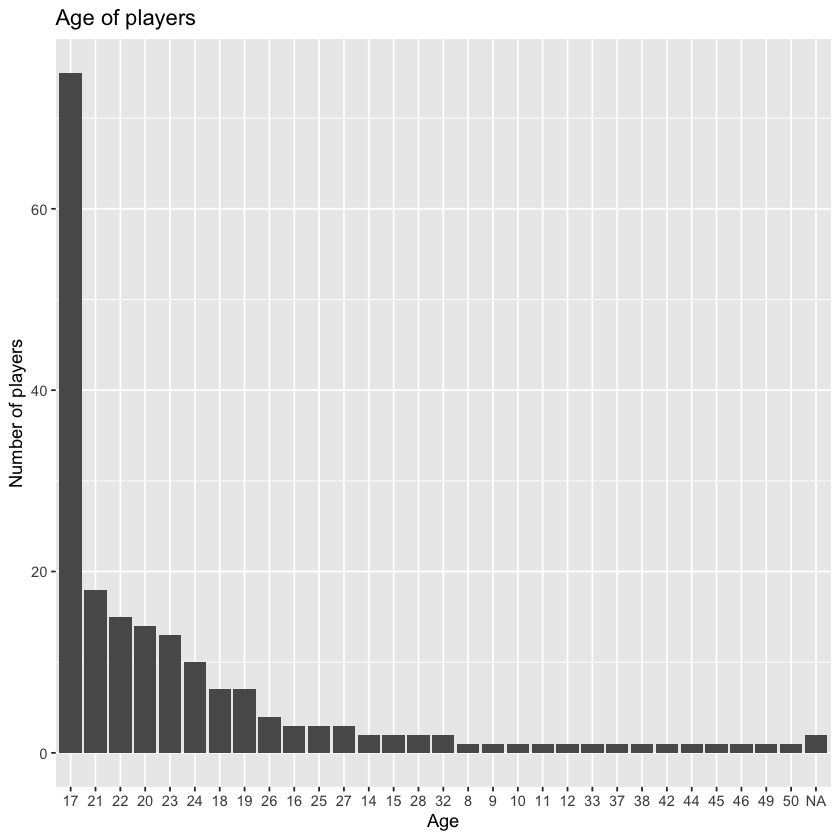

In [3]:
player_data |>
    select(experience,subscribe,played_hours,gender,age) |>
    group_by(age) |>
    summarize(count = n()) |>
    ggplot(aes(x=reorder(age, -count), y=count)) +
        geom_histogram(stat="identity") +
        labs(x="Age", y="Number of players") +
        ggtitle("Age of players")


## Activity #3 - Visualizations

<div class="alert alert-warning">Tip: Try using a range of box plots, scatterplots, bar charts, line graphs, etc.</div>

**Vizualize: What does the distribution of the variable look like?**

**Vizualize: What relationship does it have with some of the other variables?**

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


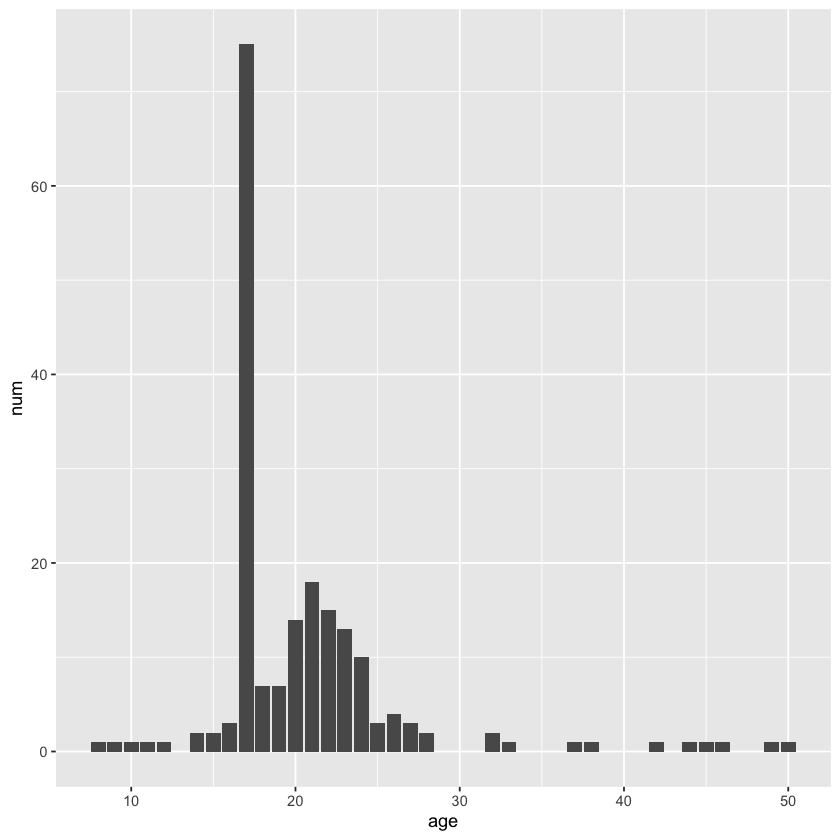

In [12]:
player_data |>
    group_by(age) |>
    summarize(num = n()) |>
    ggplot(aes(x=age, y=num)) +
        geom_bar(stat="identity")